In [1]:
# importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

In [2]:
import os

pwd = os.getcwd()

# loading the dataset
df = pd.read_csv(pwd + '\merged_data.csv')
df.head(10)

,Date,Open,Close,Change,sentiment,sentiment_score
0,2025-01-10,3761.549,3736.886,-0.66,0,0.700804
1,2024-12-19,3780.106,3708.531,-1.93,0,0.950467
2,2024-12-18,3774.744,3781.551,0.18,1,0.460880
3,2024-12-16,3748.220,3765.163,0.45,1,0.771217
4,2024-12-12,3744.519,3748.267,0.10,1,0.927686
5,2024-12-11,3749.319,3744.451,-0.13,1,0.844994
6,2024-12-10,3735.431,3749.303,0.37,0,0.695004
7,2024-12-06,3782.755,3752.733,-0.80,-1,0.504000
8,2024-12-05,3785.848,3782.822,-0.08,0,0.641164
9,2024-12-03,3780.565,3788.521,0.21,1,0.945470


In [3]:
df.dropna(inplace=True)
df.head(10)

,Date,Open,Close,Change,sentiment,sentiment_score
0,2025-01-10,3761.549,3736.886,-0.66,0,0.700804
1,2024-12-19,3780.106,3708.531,-1.93,0,0.950467
2,2024-12-18,3774.744,3781.551,0.18,1,0.460880
3,2024-12-16,3748.220,3765.163,0.45,1,0.771217
4,2024-12-12,3744.519,3748.267,0.10,1,0.927686
5,2024-12-11,3749.319,3744.451,-0.13,1,0.844994
6,2024-12-10,3735.431,3749.303,0.37,0,0.695004
7,2024-12-06,3782.755,3752.733,-0.80,-1,0.504000
8,2024-12-05,3785.848,3782.822,-0.08,0,0.641164
9,2024-12-03,3780.565,3788.521,0.21,1,0.945470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             430 non-null    object 
 1   Open             430 non-null    float64
 2   Close            430 non-null    float64
 3   Change           430 non-null    float64
 4   sentiment        430 non-null    int64  
 5   sentiment_score  430 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 20.3+ KB


In [5]:
df.columns

Index(['Date', 'Open', 'Close', 'Change', 'sentiment', 'sentiment_score'], dtype='object')

In [6]:
df.drop(['Open', 'Change', 'sentiment', 'sentiment_score'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    430 non-null    object 
 1   Close   430 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.8+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df_chg = df.set_index(['Date'], drop=True)
df_chg.head()

,Close
Date,
2025-01-10,3736.886
2024-12-19,3708.531
2024-12-18,3781.551
2024-12-16,3765.163
2024-12-12,3748.267


<Axes: xlabel='Date'>

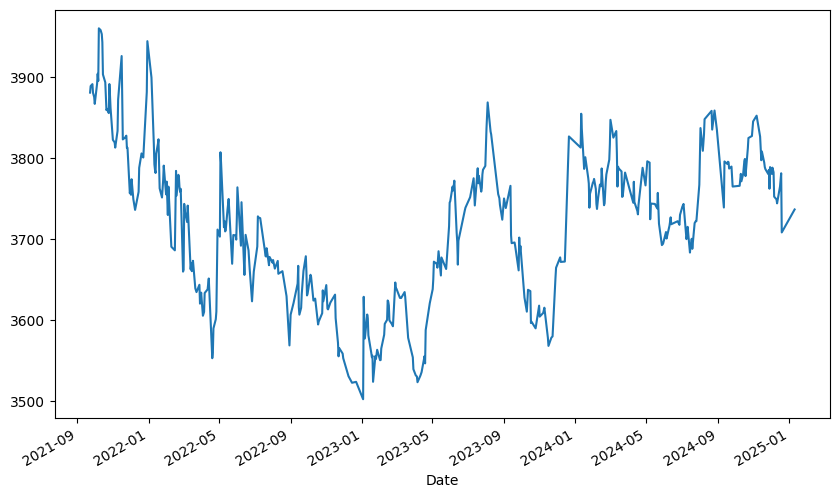

In [8]:
plt.figure(figsize=(10, 6))
df_chg['Close'].plot()

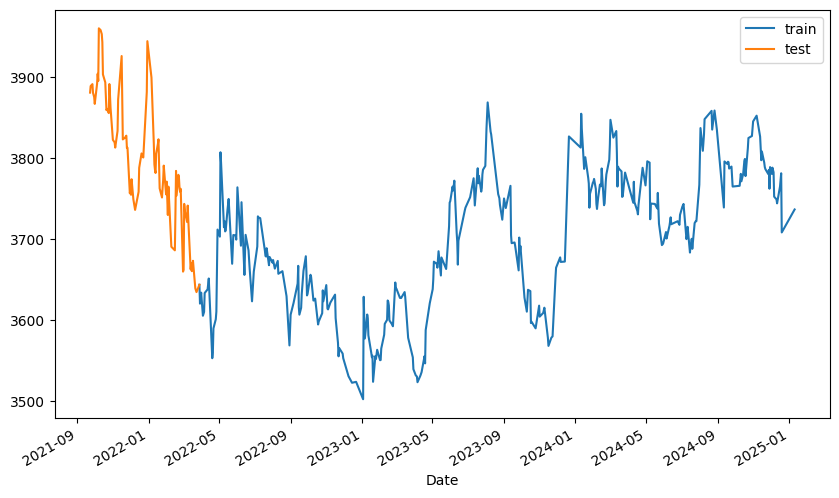

In [13]:
# splitting the dataset into training and testing sets
split_date = df_chg.index[int(len(df_chg) * 0.8)]
df1 = df_chg['Close']

train = df1.loc[:split_date]
test = df1.loc[split_date:]

plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [ ]:
print('There are', len(train), 'values in the training set.')
print('There are', len(test), 'values in the test set.')

There are 345 values in the training set.
There are 86 values in the test set.


In [15]:
train_processed = df_chg.iloc[:, 0:1].values
train_processed = train_processed[0:345:1]

test_processed = df_chg.iloc[:, 0:1].values
test_processed = test_processed[344:430:1]

In [16]:
scaler = MinMaxScaler(feature_range=(-1, 1))

train_scaled = scaler.fit_transform(train_processed)
test_scaled = scaler.transform(test_processed)

In [17]:
X_train = train_scaled[:-1]
y_train = train_scaled[1:]

In [18]:
X_test = test_scaled[:-1]

y_test = test_scaled[1:]



We create a Sequantial model

add layers via the .add() method

Pass an input_dim argument to the first layer.

The activation function is the Rectified Linear Unit- Relu.

Configure the learning process, which is done via the compile method.

A loss function is mean_squared_error , and An optimizer is adam.

Stop training when a monitored loss has stopped improving.

patience=2, indicate number of epochs with no improvement after which training will be stopped.

The ANN is trained for 100 epochs and a batch size of 1 is used.



In [19]:
# ann model
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)

history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)


Epoch 1/100
344/344 [==============================] - 1s 1ms/step - loss: 0.0684
Epoch 2/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0279
Epoch 3/100
344/344 [==============================] - 0s 990us/step - loss: 0.0260
Epoch 4/100
344/344 [==============================] - 0s 998us/step - loss: 0.0256
Epoch 5/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 6/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0249
Epoch 7/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 8/100
344/344 [==============================] - 0s 995us/step - loss: 0.0245
Epoch 9/100
344/344 [==============================] - 0s 998us/step - loss: 0.0243
Epoch 10/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 11/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0241
Epoch 12/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0240
Epoch

In [20]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

11/11 [==============================] - 0s 1ms/step
The R2 score on the Train set is:	0.884
The R2 score on the Test set is:	0.722


In [21]:
train_sc_df = pd.DataFrame(train_scaled, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_scaled, columns=['Y'], index=test.index)

for s in range(1, 2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)
    
X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train['X_1']
y_train = y_train['Y']
X_test = X_test['X_1']
y_test = y_test['Y']

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

LSTM has a visible layer with 1 input.

A hidden layer with LSTM neurons.

We used relu activation function for the LSTM neurons.

A loss function is mean_squared_error , and An optimizer is adam.

Stop training when a monitored loss has stopped improving.

The LSTM is trained for 100 epoch and a batch size of 1 is used.


In [22]:
X_train_lmse = X_train.reshape(X_train.shape[0], 1, 1)
X_test_lmse = X_test.reshape(X_test.shape[0], 1, 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (344, 1, 1)
Test shape:  (85, 1, 1)


In [23]:
# lstm model
lstm_model = Sequential()

lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), 
                    activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)

history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
344/344 [==============================] - 1s 1ms/step - loss: 0.1475
Epoch 2/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0698
Epoch 3/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0385
Epoch 4/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0302
Epoch 5/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 6/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0255
Epoch 7/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 8/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 9/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0239
Epoch 10/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 11/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0237
Epoch 12/100
344/344 [==============================] - 0s 1ms/step - loss: 0.0237
Epoch 13/100


In [24]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

11/11 [==============================] - 0s 1ms/step
The R2 score on the Train set is:	0.889
The R2 score on the Test set is:	0.781


In [25]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)

85/85 [==============================] - 0s 964us/step - loss: 0.0406
NN: 0.051476
LSTM: 0.040612


In [26]:
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

3/3 [==============================] - 0s 2ms/step


In [29]:
y_pred_test_nn = nn_model.predict(X_test)


InvalidArgumentError: Graph execution error:

Detected at node sequential/dense/MatMul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 608, in run_forever

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 84, in _run

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\ivane\AppData\Local\Temp\ipykernel_23528\3737469780.py", line 1, in <module>

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 2631, in predict

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 2416, in predict_function

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 2401, in step_function

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 2389, in run_step

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 2357, in predict_step

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\ivane\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py", line 241, in call

In[0] ndims must be >= 2: 1
	 [[{{node sequential/dense/MatMul}}]] [Op:__inference_predict_function_67483]

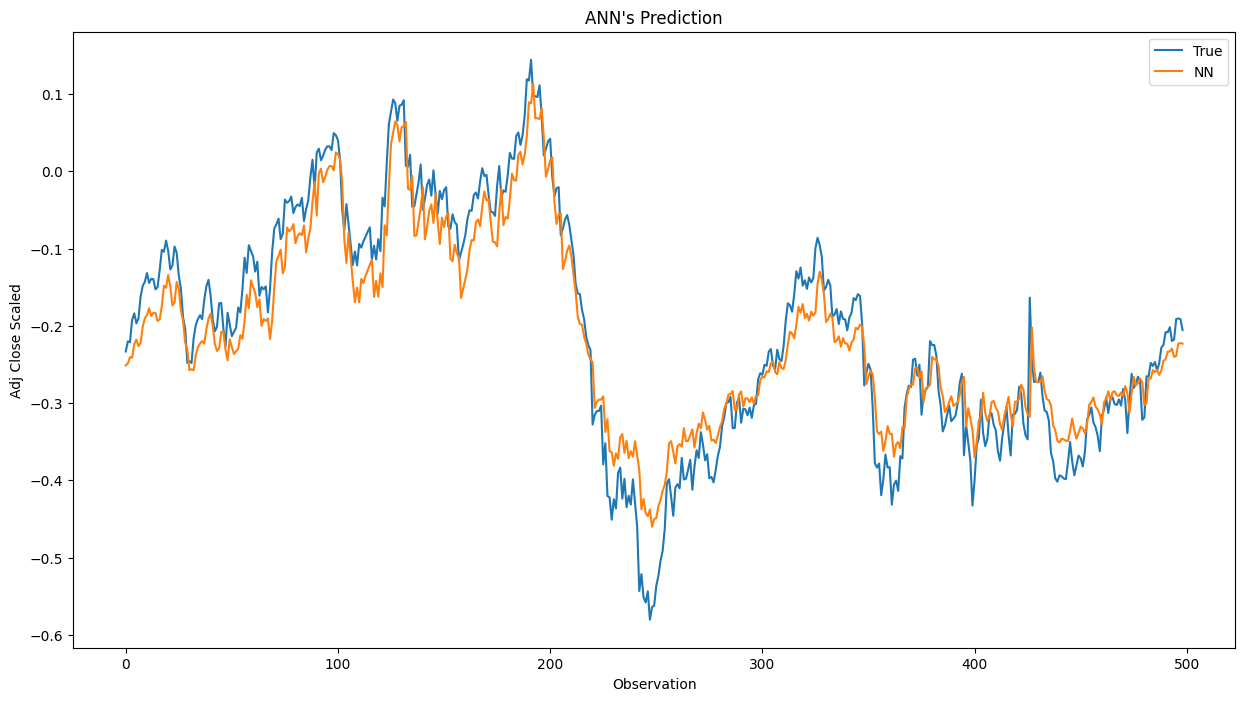

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

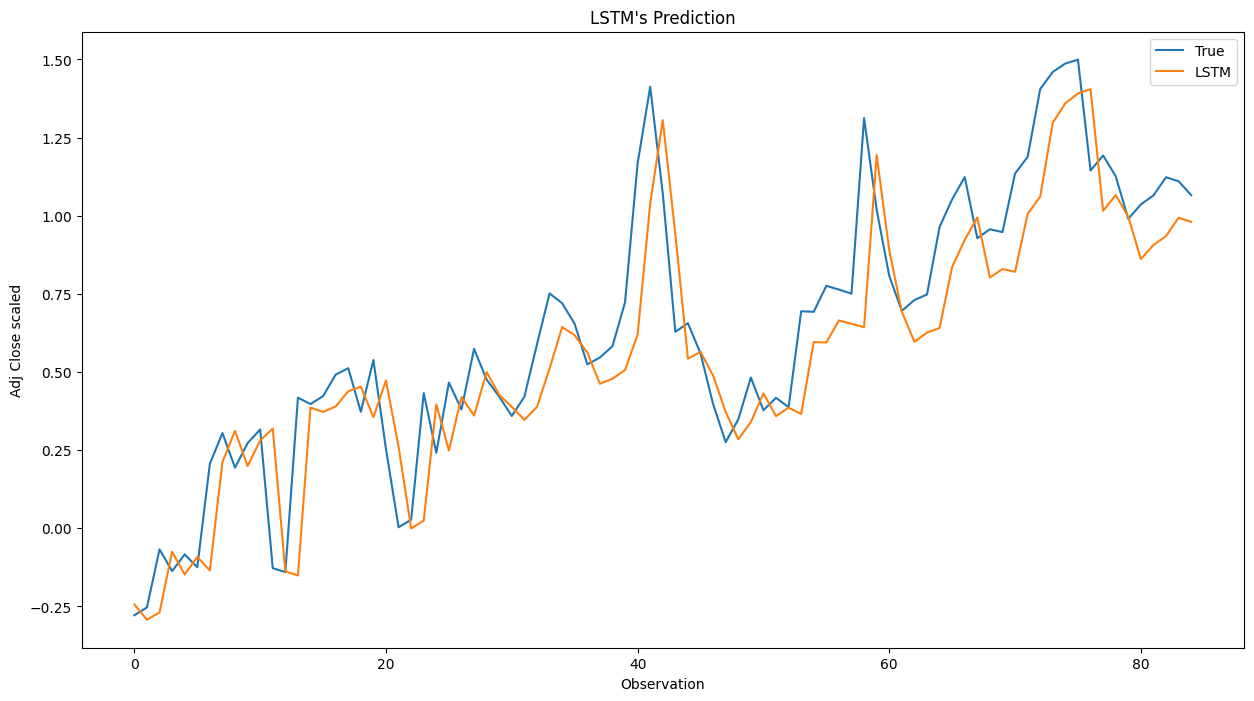

In [28]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(lstm_y_pred_test, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();